In [0]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/widsrecife/dados/master/datathon2020/training_v2.csv")

In [3]:
df.shape

(91713, 186)

## Colunas por tipo da feature

In [4]:
df.dtypes.value_counts()

float64    170
object       8
int64        8
dtype: int64

In [5]:
# categóricas
df.select_dtypes(include='object').columns

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [6]:
# inteiros
df.select_dtypes(include='int').columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death',
       'elective_surgery', 'icu_id', 'readmission_status',
       'apache_post_operative'],
      dtype='object')

In [7]:
# float
df.select_dtypes(include='float').columns

Index(['age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'albumin_apache',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache',
       'bilirubin_apache',
       ...
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object', length=170)

## Features categóricas

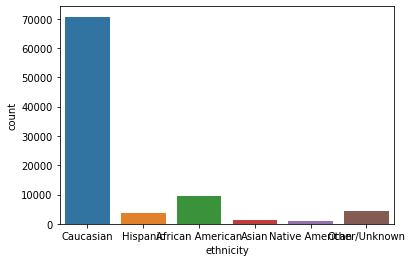

In [8]:
sns.countplot(x="ethnicity", data=df)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

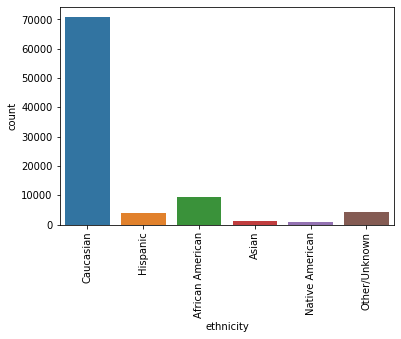

In [9]:
# mudando a orientação das labels
sns.countplot(x="ethnicity", data=df)
plt.xticks(rotation=90)

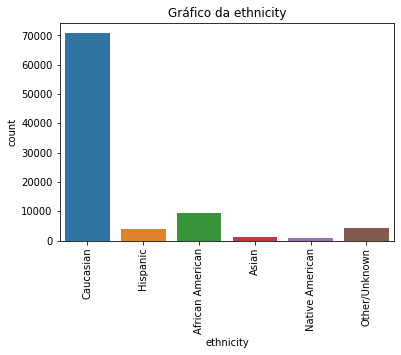

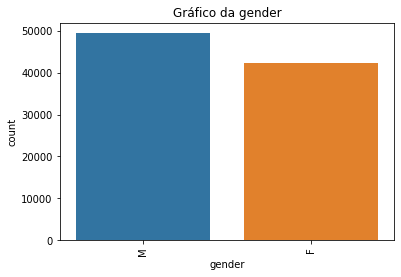

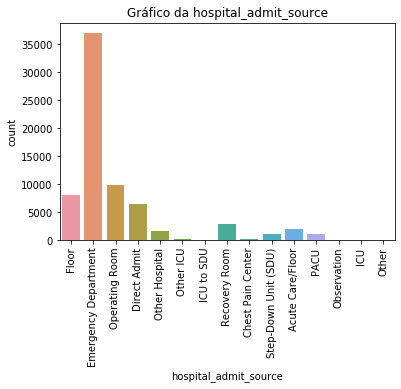

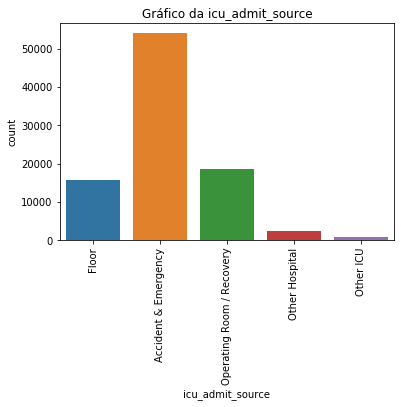

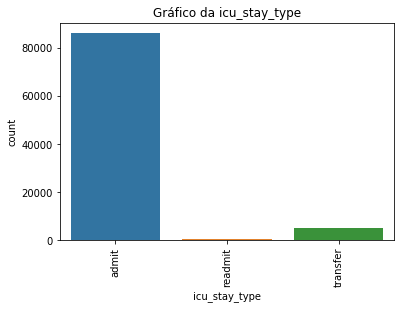

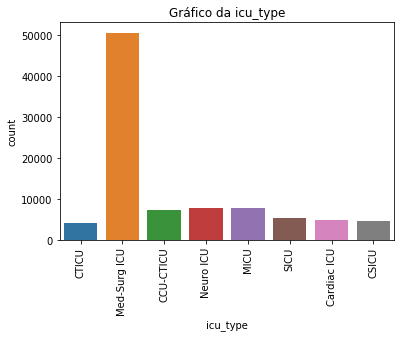

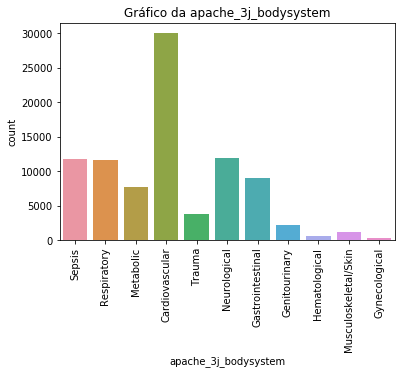

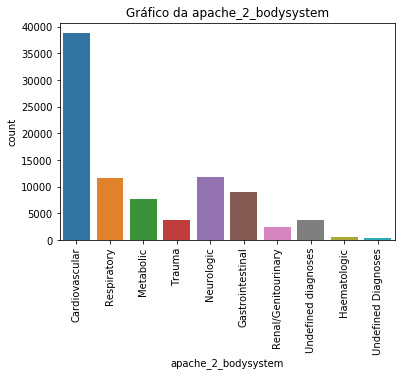

In [10]:
for column in df.select_dtypes(include='object').columns:
    sns.countplot(x=column, data=df)
    plt.title("Gráfico da "+column)
    plt.xticks(rotation=90)
    plt.show()

In [13]:
pd.crosstab(df.ethnicity, df.hospital_death, margins=True, normalize="index")

hospital_death,0,1
ethnicity,,
African American,0.921441,0.078559
Asian,0.917626,0.082374
Caucasian,0.912738,0.087262
Hispanic,0.900948,0.099052
Native American,0.911168,0.088832
Other/Unknown,0.919296,0.080704
All,0.913528,0.086472


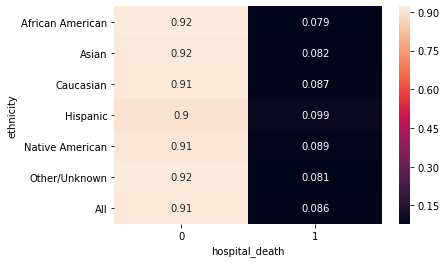

In [0]:
# O crosstab calcula a fraquência da cada valor
sns.heatmap(pd.crosstab(df.ethnicity, df.hospital_death, margins=True, normalize="index"),annot=True)

## Features contínuas

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

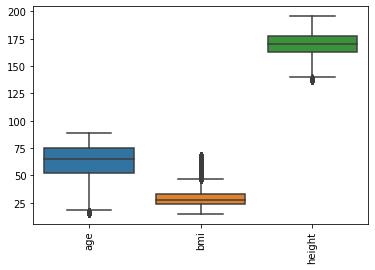

In [15]:
sns.boxplot(data=df.select_dtypes("float").iloc[:,[0,1,2]])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

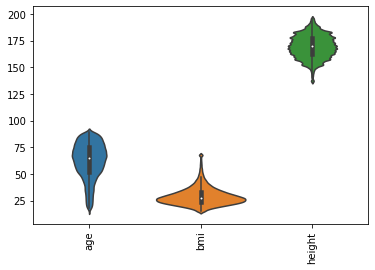

In [16]:
sns.violinplot(data=df.select_dtypes("float").iloc[:,[0,1,2]])
plt.xticks(rotation=90)

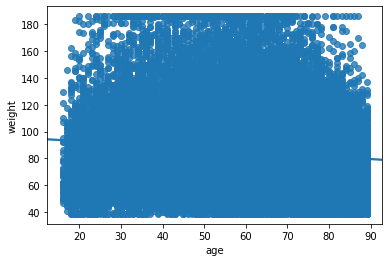

In [17]:
sns.regplot(x="age", y="weight", data=df)

# Explorando o dicionário de variáveis

In [0]:
df_variaveis = pd.read_csv("https://raw.githubusercontent.com/widsrecife/dados/master/datathon2020/WiDS%20Datathon%202020%20Dictionary.csv")

In [0]:
df_variaveis.columns

Index(['Category', 'Variable Name', 'Unit of Measure', 'Data Type',
       'Description', 'Example'],
      dtype='object')

In [0]:
df_variaveis["first_hour"] = df_variaveis.Description.apply(lambda x: "first hour" in str(x))
df_variaveis.first_hour.value_counts()

False    124
True      64
Name: first_hour, dtype: int64

In [0]:
list(df_variaveis[df_variaveis.first_hour].Description)

["The patient's highest diastolic blood pressure during the first hour of their unit stay, invasively measured",
 "The patient's lowest diastolic blood pressure during the first hour of their unit stay, invasively measured",
 "The patient's highest diastolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured",
 "The patient's lowest diastolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured",
 "The patient's highest diastolic blood pressure during the first hour of their unit stay, non-invasively measured",
 "The patient's lowest diastolic blood pressure during the first hour of their unit stay, non-invasively measured",
 "The patient's highest heart rate during the first hour of their unit stay",
 "The patient's lowest heart rate during the first hour of their unit stay",
 "The patient's highest mean blood pressure during the first hour of their unit stay, invasively measured",
 "Th

In [0]:
df_variaveis["first_24_hours"] = df_variaveis.Description.apply(lambda x: "hours" in str(x))
df_variaveis.first_24_hours.value_counts()

False    102
True      86
Name: first_24_hours, dtype: int64

In [0]:
list(df_variaveis[df_variaveis.first_24_hours].Description)

['The albumin concentration measured during the first 24 hours which results in the highest APACHE III score',
 'Whether the patient had acute renal failure during the first 24 hours of their unit stay, defined as a 24 hour urine output <410ml, creatinine >=133 micromol/L and no chronic dialysis',
 'The bilirubin concentration measured during the first 24 hours which results in the highest APACHE III score',
 'The blood urea nitrogen concentration measured during the first 24 hours which results in the highest APACHE III score',
 'The creatinine concentration measured during the first 24 hours which results in the highest APACHE III score',
 'The fraction of inspired oxygen from the arterial blood gas taken during the first 24 hours of unit admission which produces the highest APACHE III score for oxygenation',
 'The eye opening component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score',
 'The motor component of the Glasgow Com

In [0]:
df_variaveis["not_time_related"] = df_variaveis.Description.apply(lambda x: "hour" not in str(x))

In [0]:
list(df_variaveis.query("not_time_related == True").Description)

['Unique identifier associated with a patient unit stay',
 'Unique identifier associated with a hospital',
 'Unique identifier associated with a patient',
 'Whether the patient died during this hospitalization',
 'The age of the patient on unit admission',
 'The body mass index of the person on unit admission',
 'Whether the patient was admitted to the hospital for an elective surgical operation',
 'The common national or cultural tradition which the person belongs to',
 'The genotypical sex of the patient',
 'The height of the person on unit admission',
 'The location of the patient prior to being admitted to the hospital',
 'The location of the patient prior to being admitted to the unit',
 'The type of unit admission for the patient',
 'A unique identifier for the unit to which the patient was admitted',
 nan,
 'A classification which indicates the type of care the unit is capable of providing',
 'The length of stay of the patient between hospital admission and unit admission',
 'Wh